## kNN and bagging

**Question:** suppose we use kNN with bootstrap aggregation. What's the distribution of occurrences for various neighbors?

This might be used to decide the "appropriate" weights for a softer version of kNN.

Let's use $i$ to label the points in order of distance, so $i=0$ is the closest point, $i=1$ is the next, etc.
If k = 1, the occurrence of the closest point will be distributed as

i  | prob 1st in bootstrap
---|---
0  | $1-\frac{1}{e}$ 
1 | $\frac{1}{e}-\frac{1}{e^2}$
2 | $\frac{1}{e^2}-\frac{1}{e^3}$

How many copies of each one are in the bootstrap (assuming a large number of points)?

n  | prob of that many copies of a given point
---|-------
0  | $\frac{1}{e}$
1 | $\frac{1}{e}-\frac{1}{e^2}$
2 | $\frac{1}{e^2}-\frac{1}{e^3}$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
from collections import Counter

In [2]:
def knn_bootstrap_density(m, n, k=1):
    '''Return probability that the mth closest point will occur n times
    in a bootstrap sample for some k'''
    # this is hard

Let's simulate.

In [3]:
def simulate_knn_bootstrap(k, trials=10000):
    counter = Counter()
    for _ in range(trials):
        m = 0  # mth closest point
        choices = []
        while True:
            picks = stats.poisson(1).rvs()
            if len(choices) + picks > k:
                picks = k - len(choices)
            choices.extend([m] * picks)
            if len(choices) == k:
                counter[tuple(choices)] += 1
                break
            m += 1
    return counter

In [4]:
def simulate_expected_knn_probabilities(k, trials=10000):
    counter = simulate_knn_bootstrap(k, trials)
    totals = Counter()
    for simulation, count in counter.items():
        for number in simulation:
            totals[number] += count
    expectation = np.zeros(max(totals)+1)
    for occurances in totals:
        expectation[occurances] = totals[occurances]
    expectation /= trials
    return expectation

<BarContainer object of 6 artists>

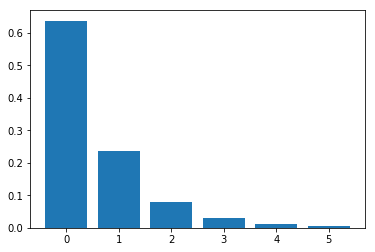

In [5]:
fig, ax = plt.subplots()
expectation = simulate_expected_knn_probabilities(1, 1000)
ax.bar(range(len(expectation)), expectation)

<BarContainer object of 20 artists>

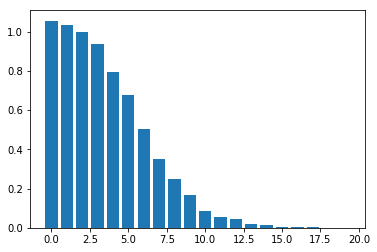

In [7]:
fig, ax = plt.subplots()
expectation = simulate_expected_knn_probabilities(7, 1000)
ax.bar(range(len(expectation)), expectation)

I wonder if this is a common distribution (if we divide by k). For k=1, that should be geometric.